In [3]:
# imports
import pandas as pd
import numpy as np
from os import listdir
from tqdm import tqdm
from sklearn.manifold import TSNE
from yellowbrick.cluster import KElbowVisualizer
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch, SpectralClustering, AffinityPropagation
from matplotlib import pyplot
import seaborn as sns

In [7]:
data = pd.read_csv('../data/vectors.zip', index_col=0)
data.shape

(9473, 24)

In [13]:
# create scatter plot for samples from each cluster
def create_scatter(clusters, X, yhat):
    tsne_temp = TSNE(n_components=2)
    x_tsne = tsne_temp.fit_transform(X)
    label = [str(i) for i in yhat]
    sns.scatterplot(x_tsne[:, 0], x_tsne[:, 1], hue=label)    
    pyplot.show()

### K-means

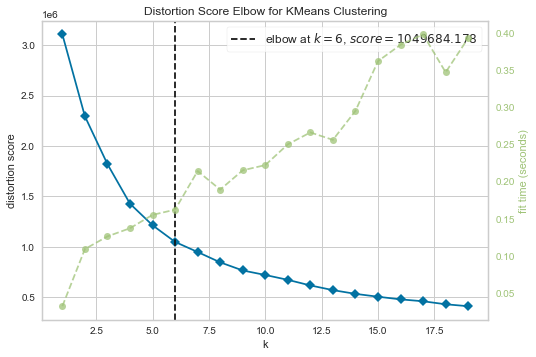

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20)).fit(data)
visualizer.show()

C:\Users\Sepehr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Sepehr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Sepehr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


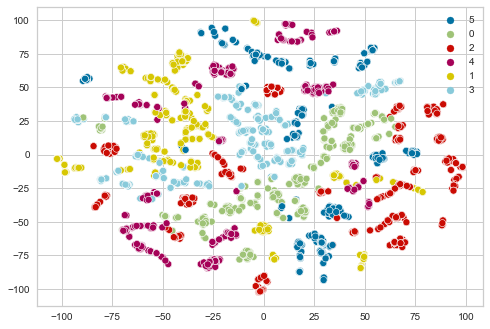

In [15]:
# define dataset
X = data
# define the model
model = KMeans(n_clusters=6, init='k-means++')
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
create_scatter(clusters, X, yhat)

### DBSCAN

In [ ]:
# define dataset
X = data
# define the model
model = DBSCAN(eps=0.2, min_samples=5)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
create_scatter(clusters, X, yhat)

### Affinity Propagation

In [ ]:
X = data
# define the model
model = AffinityPropagation(damping=0.9)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
create_scatter(clusters, X, yhat)

### Agglomerative

In [ ]:
X = data
# define the model
model = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
create_scatter(clusters, X, yhat)

### BIRCH

In [ ]:
X = data
# define the model
model = Birch(threshold=0.01, n_clusters=4)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
create_scatter(clusters, X, yhat)